#Hand Sign language detection

We have used American Sign Language which is a public dataset which normally used for communication with the disabled. This dataset can also be very useful for Human-Computer Interaction. In this notebook, we are going to find the best architecture for hand sign language detection using Deep learning.

#Importing dependencies

In [ ]:
# pip install keras

In [12]:
# pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=d5dc0b23351d31dc74eb1ac76a8f74e9fb3640ba16ec4e338a71b2b65f5c10ef
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [1]:
!wandb login

wandb: Currently logged in as: humushtaq73 (thesocialnexus). Use `wandb login --relogin` to force relogin


In [2]:
# install and import special package
# !pip install split-folders

In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

In [4]:
import pandas as pd
import numpy as np
import zipfile
import os
#Visualization tools
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go

import plotly
import matplotlib.pyplot as plt
import seaborn

#File handling tools
from PIL import Image
import os
import time
import uuid
import splitfolders
import random
import shutil
#ML Modelling
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import average_precision_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Model Logging and Hyperparameter tuning
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
# import required package
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay)
from tensorflow.keras.models import load_model
# !pip install Keras-Preprocessing
from keras_preprocessing import image
tf.__version__

'2.13.0'

In [4]:
def print_loading_bar(percentage, bar_length=40):
    progress = int(bar_length * percentage / 100)
    loading_bar = '[' + '=' * progress + ' ' * (bar_length - progress) + ']'
    sys.stdout.write('\r' + loading_bar + f' {percentage:.2f}%')
    sys.stdout.flush()

# Define paths
zip_file_path = "ML_Projects/Machine_Learning/The Social Nexus/mythesis/asl_data_archive.zip"
extract_path = "ML_Projects/Machine_Learning/The Social Nexus/mythesis/"

# Get the total number of files in the ZIP archive
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    total_files = len(zip_ref.namelist())

# Initialize a counter for extracted files
extracted_files = 0

# Unzip the downloaded file and display loading bar
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    for file in zip_ref.namelist():
        zip_ref.extract(file, path=extract_path)
        extracted_files += 1

        # Calculate the percentage and display loading bar
        progress_percentage = (extracted_files / total_files) * 100
        print_loading_bar(progress_percentage)

print("\nExtraction complete.")

NameError: ignored

#Data Loading

In [50]:
path = "ML_Projects/Machine_Learning/The Social Nexus/mythesis/ASL_Dataset"

In [51]:
images_path = path + "collectedimages"

In [52]:
os.path.join(dirData, dataType[1])

'ML_Projects/Machine_Learning/The Social Nexus/mythesis/ASL_Dataset/ASL_Dataset\\Train'

In [54]:
# remove 'nothing' and 'space' labels from datasets
dirData = path
dataType = ['Test', 'Train']
delClass = ['Nothing', 'Space']

for i in range(2):
    temp = os.path.join(dirData, dataType[i])
    for j in range(2):
        temp2 = os.path.join(temp, delClass[j])
        try:
            shutil.rmtree(temp2)
        except:
            pass

In [63]:
os.listdir(os.path.join(dirData))

['Test', 'Train']

In [65]:
# Define paths
source_dir = os.path.join(dirData,dataType[1])
destination_dir = os.path.join(dirData)
# input_folder_path = os.path.join(destination_dir, 'input')
# os.makedirs(input_folder_path, exist_ok=True)
# Rename 'Train' folder to 'input'
try:
    shutil.copytree(os.path.join(source_dir),
                    os.path.join(destination_dir,'input'))
except FileExistsError:
    print("'input' folder already exists.")
except Exception as e:
    print(f"An error occurred: {e}")

'input' folder already exists.


In [78]:
dirData

'ML_Projects/Machine_Learning/The Social Nexus/mythesis/ASL_Dataset'

In [82]:
os.listdir(os.path.join(dirData, 'Val'))

FileNotFoundError: ignored

#Data Partition

In [88]:

# split data training into two folders, named 'train' and 'val'

splitfolders.ratio(os.path.join(dirData, 'input'),
                    output = os.path.join(dirData, 'Val'),
                    ratio = (0.70, 0.30))

In [40]:
# # delete the folder named 'input'
# try:
#     shutil.rmtree(os.path.join(dirData, 'input'))
# except:
#     pass

In [89]:
# move folder named 'test' and 'val'
folderType = ['train', 'val']
dataType = ['Train', 'Val']

try:
    for i in range(2):
        temp = os.path.join(dirData, 'output')
        os.rename(os.path.join(temp, folderType[i]),
                  os.path.join(dirData, dataType[i]))
    shutil.rmtree(os.path.join(dirData, 'output'))
except:
    pass

In [90]:
# make sure to divide the datasets into 'Train', 'Val', and 'Test'
os.listdir(dirData)

['input', 'Test', 'Train', 'Val']

## Assigning new path

In [5]:
path = "ML_Projects/Machine_Learning/The Social Nexus/mythesis/ASL_Dataset/Val"

In [6]:
dirData = path

In [7]:
os.listdir(dirData)

['Test', 'Train', 'Val']

In [8]:
# remember our data directory, now take the 'train' and 'val' paths
dirTrain = os.path.join(dirData, 'Train')
dirVal = os.path.join(dirData, 'Val')

In [9]:
# make sure the number of labels matches
if os.listdir(dirTrain) == os.listdir(dirVal):
    labels = os.listdir(dirTrain)
labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [10]:
len(labels)

26

#Data Preprocessing
Setting up Data Generator

In [11]:
# settings new images for data training
setTrain = ImageDataGenerator(rescale = 1./255,
                              horizontal_flip = True, # remember to also build for right hand
                              fill_mode = 'nearest',
                              brightness_range = [0.6, 2.1],
                              zoom_range = 0.32)

In [12]:
# settings new images for data validation
setVal = ImageDataGenerator(rescale = 1./255)

In [13]:
# generate new images for data training
genTrain = setTrain.flow_from_directory(dirTrain,
                                        target_size = (200, 200),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        seed = 250)

# generate new images for data validation
genVal = setVal.flow_from_directory(dirVal,
                                    target_size = (200, 200),
                                    batch_size = 32,
                                    class_mode = 'categorical',
                                    seed = 250)
# does the label match? good!
if genTrain.class_indices == genVal.class_indices:
    print(genTrain.class_indices)

Found 107645 images belonging to 26 classes.
Found 46143 images belonging to 26 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [14]:
# Set your image size and output shape
IMAGE_SIZE = 200
OUTPUT_SHAPE = len(genTrain.class_indices)  # Assuming this gives the number of classes

In [15]:
modelpath = 'ML_Projects/Machine_Learning/The Social Nexus/mythesis/'

#MobileNetV2

##Model Building

In [123]:
def mainModel():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(len(genTrain.class_indices), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Show the model summary
mobilenetv2_model = mainModel()
mobilenetv2_model.summary()


9406464/9406464 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 100, 100, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 100, 100, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

## Training Model

In [130]:
# compile the model
    # Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints
np.random.seed(42)
wandb.init(
        project="handsignlanguage",
         config={
            "loss": "categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 25,
            "batch_size": 32,
        },
        )
config = wandb.config
wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]
mobilenetv2_model.compile(loss = config.loss,
              optimizer = tf.optimizers.Adam(learning_rate = 0.0015),
              metrics = [config.metric])

startTime = time.time()
mobilenetv2_model.fit(genTrain,
          batch_size = config.batch_size,
          steps_per_epoch = 32,
          epochs = 25,
          validation_data = genVal,
          validation_steps = 2,  # Number of batches from the validation dataset to use
          verbose = 2,
          callbacks=wandb_callbacks,
          n_jobs=-1)
finishTime = time.time()

# calculate the time in minutes
print(f'\nThis model took {round((finishTime - startTime)/60, 2)} minutes to finish.')

Epoch 1/25
INFO:tensorflow:Assets written to: my_model_01\assets


INFO:tensorflow:Assets written to: my_model_01\assets
wandb: Adding directory to artifact (.\my_model_01)... Done. 0.2s


32/32 - 109s - loss: 1.2675 - accuracy: 0.6318 - val_loss: 6.3991 - val_accuracy: 0.2656 - 109s/epoch - 3s/step
Epoch 2/25
INFO:tensorflow:Assets written to: my_model_02\assets


INFO:tensorflow:Assets written to: my_model_02\assets
wandb: Adding directory to artifact (.\my_model_02)... Done. 0.2s


32/32 - 86s - loss: 0.4821 - accuracy: 0.8721 - val_loss: 12.5747 - val_accuracy: 0.1406 - 86s/epoch - 3s/step
Epoch 3/25
INFO:tensorflow:Assets written to: my_model_03\assets


INFO:tensorflow:Assets written to: my_model_03\assets
wandb: Adding directory to artifact (.\my_model_03)... Done. 0.2s


32/32 - 88s - loss: 0.3878 - accuracy: 0.8965 - val_loss: 18.0131 - val_accuracy: 0.0781 - 88s/epoch - 3s/step
Epoch 4/25
INFO:tensorflow:Assets written to: my_model_04\assets


INFO:tensorflow:Assets written to: my_model_04\assets
wandb: Adding directory to artifact (.\my_model_04)... Done. 0.2s


32/32 - 90s - loss: 0.1129 - accuracy: 0.9668 - val_loss: 20.3607 - val_accuracy: 0.1562 - 90s/epoch - 3s/step
Epoch 5/25
INFO:tensorflow:Assets written to: my_model_05\assets


INFO:tensorflow:Assets written to: my_model_05\assets
wandb: Adding directory to artifact (.\my_model_05)... Done. 0.2s


32/32 - 93s - loss: 0.1047 - accuracy: 0.9688 - val_loss: 24.5866 - val_accuracy: 0.1406 - 93s/epoch - 3s/step
Epoch 6/25
INFO:tensorflow:Assets written to: my_model_06\assets


INFO:tensorflow:Assets written to: my_model_06\assets
wandb: Adding directory to artifact (.\my_model_06)... Done. 0.1s


32/32 - 78s - loss: 0.1788 - accuracy: 0.9512 - val_loss: 16.8602 - val_accuracy: 0.2656 - 78s/epoch - 2s/step
Epoch 7/25
INFO:tensorflow:Assets written to: my_model_07\assets


INFO:tensorflow:Assets written to: my_model_07\assets
wandb: Adding directory to artifact (.\my_model_07)... Done. 0.1s


32/32 - 68s - loss: 0.2420 - accuracy: 0.9324 - val_loss: 22.3828 - val_accuracy: 0.0469 - 68s/epoch - 2s/step
Epoch 8/25
INFO:tensorflow:Assets written to: my_model_08\assets


INFO:tensorflow:Assets written to: my_model_08\assets
wandb: Adding directory to artifact (.\my_model_08)... Done. 0.1s


32/32 - 79s - loss: 0.2315 - accuracy: 0.9404 - val_loss: 12.8183 - val_accuracy: 0.2344 - 79s/epoch - 2s/step
Epoch 9/25
INFO:tensorflow:Assets written to: my_model_09\assets


INFO:tensorflow:Assets written to: my_model_09\assets
wandb: Adding directory to artifact (.\my_model_09)... Done. 0.1s


32/32 - 76s - loss: 0.1249 - accuracy: 0.9678 - val_loss: 19.4592 - val_accuracy: 0.1250 - 76s/epoch - 2s/step
Epoch 10/25
INFO:tensorflow:Assets written to: my_model_10\assets


INFO:tensorflow:Assets written to: my_model_10\assets
wandb: Adding directory to artifact (.\my_model_10)... Done. 0.1s


32/32 - 82s - loss: 0.1667 - accuracy: 0.9551 - val_loss: 23.3105 - val_accuracy: 0.1250 - 82s/epoch - 3s/step
Epoch 11/25
INFO:tensorflow:Assets written to: my_model_11\assets


INFO:tensorflow:Assets written to: my_model_11\assets
wandb: Adding directory to artifact (.\my_model_11)... Done. 0.1s


32/32 - 70s - loss: 0.1461 - accuracy: 0.9668 - val_loss: 24.9485 - val_accuracy: 0.0781 - 70s/epoch - 2s/step
Epoch 12/25
INFO:tensorflow:Assets written to: my_model_12\assets


INFO:tensorflow:Assets written to: my_model_12\assets
wandb: Adding directory to artifact (.\my_model_12)... Done. 0.1s


32/32 - 70s - loss: 0.1107 - accuracy: 0.9697 - val_loss: 21.6923 - val_accuracy: 0.1094 - 70s/epoch - 2s/step
Epoch 13/25
INFO:tensorflow:Assets written to: my_model_13\assets


INFO:tensorflow:Assets written to: my_model_13\assets
wandb: Adding directory to artifact (.\my_model_13)... Done. 0.1s


32/32 - 71s - loss: 0.0499 - accuracy: 0.9863 - val_loss: 14.3049 - val_accuracy: 0.0938 - 71s/epoch - 2s/step
Epoch 14/25
INFO:tensorflow:Assets written to: my_model_14\assets


INFO:tensorflow:Assets written to: my_model_14\assets
wandb: Adding directory to artifact (.\my_model_14)... Done. 0.1s


32/32 - 73s - loss: 0.0386 - accuracy: 0.9893 - val_loss: 8.2067 - val_accuracy: 0.3594 - 73s/epoch - 2s/step
Epoch 15/25
INFO:tensorflow:Assets written to: my_model_15\assets


INFO:tensorflow:Assets written to: my_model_15\assets
wandb: Adding directory to artifact (.\my_model_15)... Done. 0.1s


32/32 - 71s - loss: 0.0368 - accuracy: 0.9902 - val_loss: 11.2216 - val_accuracy: 0.2812 - 71s/epoch - 2s/step
Epoch 16/25
INFO:tensorflow:Assets written to: my_model_16\assets


INFO:tensorflow:Assets written to: my_model_16\assets
wandb: Adding directory to artifact (.\my_model_16)... Done. 0.1s


32/32 - 71s - loss: 0.1700 - accuracy: 0.9639 - val_loss: 13.3307 - val_accuracy: 0.3125 - 71s/epoch - 2s/step
Epoch 17/25
INFO:tensorflow:Assets written to: my_model_17\assets


INFO:tensorflow:Assets written to: my_model_17\assets
wandb: Adding directory to artifact (.\my_model_17)... Done. 0.1s


32/32 - 71s - loss: 0.1157 - accuracy: 0.9727 - val_loss: 18.2782 - val_accuracy: 0.1250 - 71s/epoch - 2s/step
Epoch 18/25
INFO:tensorflow:Assets written to: my_model_18\assets


INFO:tensorflow:Assets written to: my_model_18\assets
wandb: Adding directory to artifact (.\my_model_18)... Done. 0.1s


32/32 - 71s - loss: 0.1133 - accuracy: 0.9648 - val_loss: 14.3581 - val_accuracy: 0.1875 - 71s/epoch - 2s/step
Epoch 19/25
INFO:tensorflow:Assets written to: my_model_19\assets


INFO:tensorflow:Assets written to: my_model_19\assets
wandb: Adding directory to artifact (.\my_model_19)... Done. 0.1s


32/32 - 70s - loss: 0.1536 - accuracy: 0.9551 - val_loss: 16.8758 - val_accuracy: 0.1250 - 70s/epoch - 2s/step
Epoch 20/25
INFO:tensorflow:Assets written to: my_model_20\assets


INFO:tensorflow:Assets written to: my_model_20\assets
wandb: Adding directory to artifact (.\my_model_20)... Done. 0.1s


32/32 - 71s - loss: 0.2035 - accuracy: 0.9365 - val_loss: 32.1341 - val_accuracy: 0.0312 - 71s/epoch - 2s/step
Epoch 21/25
INFO:tensorflow:Assets written to: my_model_21\assets


INFO:tensorflow:Assets written to: my_model_21\assets
wandb: Adding directory to artifact (.\my_model_21)... Done. 0.1s


32/32 - 73s - loss: 0.1159 - accuracy: 0.9600 - val_loss: 31.4234 - val_accuracy: 0.0469 - 73s/epoch - 2s/step
Epoch 22/25
INFO:tensorflow:Assets written to: my_model_22\assets


INFO:tensorflow:Assets written to: my_model_22\assets
wandb: Adding directory to artifact (.\my_model_22)... Done. 0.1s


32/32 - 72s - loss: 0.0622 - accuracy: 0.9844 - val_loss: 16.4610 - val_accuracy: 0.1406 - 72s/epoch - 2s/step
Epoch 23/25
INFO:tensorflow:Assets written to: my_model_23\assets


INFO:tensorflow:Assets written to: my_model_23\assets
wandb: Adding directory to artifact (.\my_model_23)... Done. 0.1s


32/32 - 74s - loss: 0.0687 - accuracy: 0.9746 - val_loss: 18.5089 - val_accuracy: 0.0469 - 74s/epoch - 2s/step
Epoch 24/25
INFO:tensorflow:Assets written to: my_model_24\assets


INFO:tensorflow:Assets written to: my_model_24\assets
wandb: Adding directory to artifact (.\my_model_24)... Done. 0.1s


32/32 - 73s - loss: 0.1104 - accuracy: 0.9688 - val_loss: 18.2999 - val_accuracy: 0.0156 - 73s/epoch - 2s/step
Epoch 25/25
INFO:tensorflow:Assets written to: my_model_25\assets


INFO:tensorflow:Assets written to: my_model_25\assets
wandb: Adding directory to artifact (.\my_model_25)... Done. 0.1s


32/32 - 72s - loss: 0.1160 - accuracy: 0.9727 - val_loss: 10.2308 - val_accuracy: 0.1719 - 72s/epoch - 2s/step

This model took 32.06 minutes to finish.


In [17]:
# Define the directory where you want to save the model
model_save_path = modelpath+"mobilenetv2_model.h5"

# Save the model in the specified directory
# mobilenetv2_model.save(model_save_path)

# Print a message to indicate that the model has been saved
print("Trained model path has been saved.")

Trained model path has been saved.


In [137]:
# Model Evaluation(on test split)

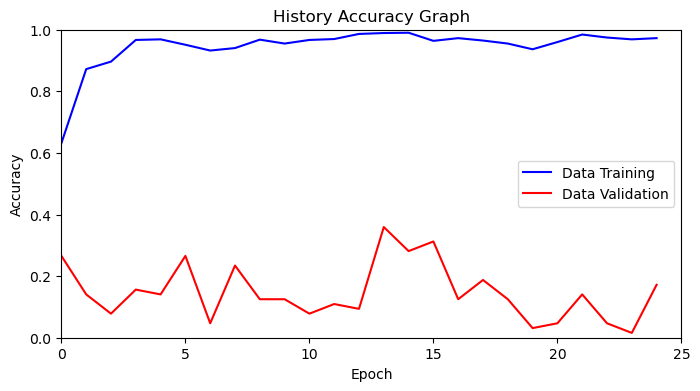

In [139]:
# save model training history into several variables
acc = mobilenetv2_model.history.history['accuracy']
valAcc = mobilenetv2_model.history.history['val_accuracy']
epoch = mobilenetv2_model.history.epoch

# configure the visualization
plt.subplots(figsize=(8, 4))
plt.plot(epoch, acc, label = 'Data Training', color = 'b')
plt.plot(epoch, valAcc, label = 'Data Validation', color = 'r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, len(epoch)])
plt.ylim([0, 1])
plt.title('History Accuracy Graph')

# and show it!
plt.legend()
plt.show()

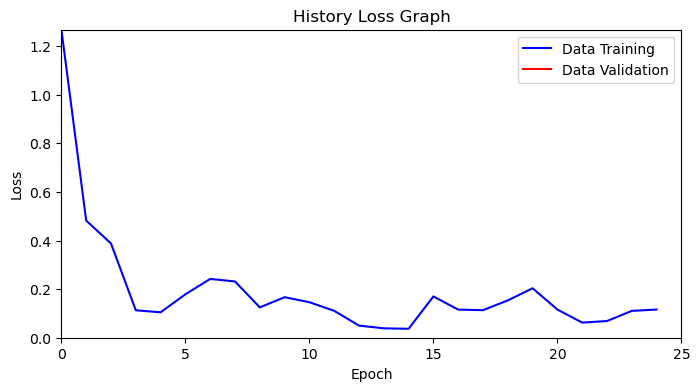

In [140]:
# do the same thing for history loss graph
loss = mobilenetv2_model.history.history['loss']
valLoss = mobilenetv2_model.history.history['val_loss']

# configure the visualization
plt.subplots(figsize=(8, 4))
plt.plot(epoch, loss, label = 'Data Training', color = 'b')
plt.plot(epoch, valLoss, label = 'Data Validation', color = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0, len(epoch)])
plt.ylim([0, max(loss)])
plt.title('History Loss Graph')

# and show it!
plt.legend()
plt.show()

##Evaluation on Test Set

In [48]:
# settings new images for data testing
setTest = ImageDataGenerator(rescale = 1./255)

In [49]:
# generate new images for data testing
dirTest = os.path.join(dirData, 'Test')
genTest = setTest.flow_from_directory(dirTest,
                                       target_size = (200, 200),
                                       batch_size = 32,
                                       class_mode = 'categorical',
                                       seed = 250)

Found 104 images belonging to 26 classes.


In [50]:
# save all those labels
y_test = genTest.classes
y_test

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16,
       17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25,
       25, 25])

In [74]:
loadedmnv2_model = tf.keras.models.load_model(modelpath+"mobilenetv2_model.h5")

In [75]:
# do the prediction
y_pred = []
for i in genTest.class_indices:
    # take the path of data test
    labelTest = dirTest+'/'+i+'/'
    for j in os.listdir(labelTest):
        # save the label
        x_pred = labelTest + j

        # load image into matrix
        img = image.load_img(x_pred, target_size = (200, 200))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        matxImg = np.vstack([x])

        # so what is the label?
        predict = loadedmnv2_model.predict(matxImg, batch_size = 32)
        predict = np.argmax(predict, axis = 1)
        y_pred.append(predict[0])

1/1 [==============================] - 0s 69ms/step


In [76]:
# calculate the accuracy of the prediction
acc_result = round(accuracy_score(y_pred, y_test), 2)
print('Accuracy: ', acc_result)

Accuracy:  0.1


In [77]:
# show the confusion matrix
conMat = confusion_matrix(y_pred, y_test,
                          labels = list(genTest.class_indices.values()))
print(conMat)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 3 0 0 0 4 0 0 0 2 0 0 0 0 2 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0 0 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 0 0 4 4 0 0 3 2 4 0 4 4 4 0 0 4 4 2 3 4 3 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 

Text(0.5, 1.0, 'Confusion Matrix for CNN Model')

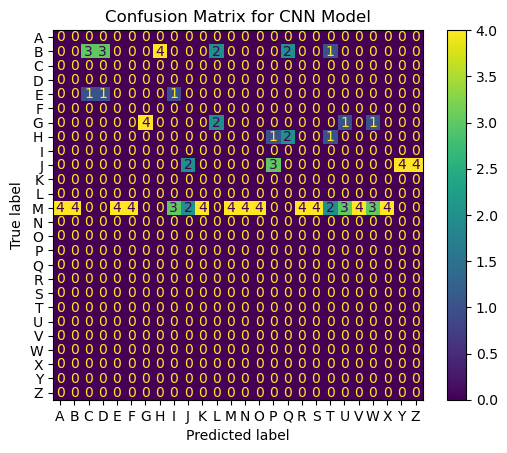

In [78]:
# visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix = conMat,
                       display_labels = list(genTest.class_indices.keys())).plot()
plt.title('Confusion Matrix for CNN Model')

In [79]:
label_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4,
    'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
    'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14,
    'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19,
    'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25
}

In [81]:
mnv2_results = classification_report(y_pred, y_test,zero_division=1)

In [82]:
mnv2_results

'              precision    recall  f1-score   support\n\n           0       0.00      1.00      0.00         0\n           1       0.00      0.00      0.00        15\n           2       0.00      1.00      0.00         0\n           3       0.00      1.00      0.00         0\n           4       0.00      0.00      0.00         3\n           5       0.00      1.00      0.00         0\n           6       1.00      0.50      0.67         8\n           7       0.00      0.00      0.00         4\n           8       0.00      1.00      0.00         0\n           9       0.50      0.15      0.24        13\n          10       0.00      1.00      0.00         0\n          11       0.00      1.00      0.00         0\n          12       1.00      0.07      0.12        61\n          13       0.00      1.00      0.00         0\n          14       0.00      1.00      0.00         0\n          15       0.00      1.00      0.00         0\n          16       0.00      1.00      0.00         0\n       

# CNN

##Building and training

In [24]:
def create_cnn_model(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), output_shape=OUTPUT_SHAPE):
    print("Building CNN model.")

    # Setup the model layers
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=256, activation='relu'),
        tf.keras.layers.Dense(units=output_shape, activation='softmax')
    ])

    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model

# Create the CNN model
cnn_model = create_cnn_model(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), output_shape=OUTPUT_SHAPE)



Building CNN model.


Training Model

In [21]:
TF_ENABLE_ONEDNN_OPTS=1

'TF_ENABLE_ONEDNN_OPTS' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
# Rest of your code
np.random.seed(42)
wandb.init(
        project="handsignlanguage",
         config={
            "loss": "categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 6,
            "batch_size": 32,
        },
)
config = wandb.config
wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]
cnn_model.compile(
    loss=config.loss,
    optimizer=tf.optimizers.Adam(learning_rate=0.0015),
    metrics=[config.metric]
)
#Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)
startTime = time.time()
cnn_model.fit(
    genTrain,
    batch_size=config.batch_size,
    steps_per_epoch=32,
    epochs=30,
    validation_data=genVal,
    validation_steps=2,
    verbose=2,
    callbacks=[wandb_callbacks, early_stopping])
finishTime = time.time()

# Calculate the time in minutes
print(f'\nThis model took {round((finishTime - startTime)/60, 2)} minutes to finish.')


epoch/accuracy,▁
epoch/epoch,▁
epoch/learning_rate,▁
epoch/loss,▁
epoch/val_accuracy,▁
epoch/val_loss,▁
epoch/accuracy,0.04395
epoch/epoch,0
epoch/learning_rate,0.0015
epoch/loss,3.25748
epoch/val_accuracy,0.0


Epoch 1/30
INFO:tensorflow:Assets written to: my_model_01\assets


INFO:tensorflow:Assets written to: my_model_01\assets
wandb: Adding directory to artifact (.\my_model_01)... Done. 0.7s


32/32 - 48s - loss: 3.6619 - accuracy: 0.0410 - val_loss: 3.2345 - val_accuracy: 0.1094 - 48s/epoch - 1s/step
Epoch 2/30
INFO:tensorflow:Assets written to: my_model_02\assets


INFO:tensorflow:Assets written to: my_model_02\assets
wandb: Adding directory to artifact (.\my_model_02)... Done. 0.7s


32/32 - 46s - loss: 3.0594 - accuracy: 0.1143 - val_loss: 3.2001 - val_accuracy: 0.0469 - 46s/epoch - 1s/step
Epoch 3/30
INFO:tensorflow:Assets written to: my_model_03\assets


INFO:tensorflow:Assets written to: my_model_03\assets
wandb: Adding directory to artifact (.\my_model_03)... Done. 0.8s


32/32 - 45s - loss: 2.8729 - accuracy: 0.1621 - val_loss: 2.6698 - val_accuracy: 0.2031 - 45s/epoch - 1s/step
Epoch 4/30
INFO:tensorflow:Assets written to: my_model_04\assets


INFO:tensorflow:Assets written to: my_model_04\assets
wandb: Adding directory to artifact (.\my_model_04)... Done. 0.8s


32/32 - 45s - loss: 2.6411 - accuracy: 0.2285 - val_loss: 2.5823 - val_accuracy: 0.2344 - 45s/epoch - 1s/step
Epoch 5/30
INFO:tensorflow:Assets written to: my_model_05\assets


INFO:tensorflow:Assets written to: my_model_05\assets
wandb: Adding directory to artifact (.\my_model_05)... Done. 0.8s


32/32 - 43s - loss: 2.4445 - accuracy: 0.2979 - val_loss: 2.3473 - val_accuracy: 0.2969 - 43s/epoch - 1s/step
Epoch 6/30
INFO:tensorflow:Assets written to: my_model_06\assets


INFO:tensorflow:Assets written to: my_model_06\assets
wandb: Adding directory to artifact (.\my_model_06)... Done. 0.8s


32/32 - 45s - loss: 2.3012 - accuracy: 0.3008 - val_loss: 2.0769 - val_accuracy: 0.3438 - 45s/epoch - 1s/step
Epoch 7/30
INFO:tensorflow:Assets written to: my_model_07\assets


INFO:tensorflow:Assets written to: my_model_07\assets
wandb: Adding directory to artifact (.\my_model_07)... Done. 0.7s


32/32 - 45s - loss: 1.9676 - accuracy: 0.3779 - val_loss: 1.7320 - val_accuracy: 0.4844 - 45s/epoch - 1s/step
Epoch 8/30
INFO:tensorflow:Assets written to: my_model_08\assets


INFO:tensorflow:Assets written to: my_model_08\assets
wandb: Adding directory to artifact (.\my_model_08)... Done. 0.8s


32/32 - 46s - loss: 1.9221 - accuracy: 0.3975 - val_loss: 1.4662 - val_accuracy: 0.5312 - 46s/epoch - 1s/step
Epoch 9/30
INFO:tensorflow:Assets written to: my_model_09\assets


INFO:tensorflow:Assets written to: my_model_09\assets
wandb: Adding directory to artifact (.\my_model_09)... Done. 0.8s


32/32 - 46s - loss: 1.7425 - accuracy: 0.4463 - val_loss: 1.2680 - val_accuracy: 0.5625 - 46s/epoch - 1s/step
Epoch 10/30
INFO:tensorflow:Assets written to: my_model_10\assets


INFO:tensorflow:Assets written to: my_model_10\assets
wandb: Adding directory to artifact (.\my_model_10)... Done. 0.8s


32/32 - 45s - loss: 1.6195 - accuracy: 0.4873 - val_loss: 1.2464 - val_accuracy: 0.5781 - 45s/epoch - 1s/step
Epoch 11/30
INFO:tensorflow:Assets written to: my_model_11\assets


INFO:tensorflow:Assets written to: my_model_11\assets
wandb: Adding directory to artifact (.\my_model_11)... Done. 0.8s


32/32 - 40s - loss: 1.5005 - accuracy: 0.5215 - val_loss: 1.0434 - val_accuracy: 0.6094 - 40s/epoch - 1s/step
Epoch 12/30
INFO:tensorflow:Assets written to: my_model_12\assets


INFO:tensorflow:Assets written to: my_model_12\assets
wandb: Adding directory to artifact (.\my_model_12)... Done. 0.9s


32/32 - 45s - loss: 1.3371 - accuracy: 0.5693 - val_loss: 1.1414 - val_accuracy: 0.5938 - 45s/epoch - 1s/step
Epoch 13/30
INFO:tensorflow:Assets written to: my_model_13\assets


INFO:tensorflow:Assets written to: my_model_13\assets
wandb: Adding directory to artifact (.\my_model_13)... Done. 0.8s


32/32 - 46s - loss: 1.2656 - accuracy: 0.5898 - val_loss: 0.8353 - val_accuracy: 0.7812 - 46s/epoch - 1s/step
Epoch 14/30
INFO:tensorflow:Assets written to: my_model_14\assets


INFO:tensorflow:Assets written to: my_model_14\assets
wandb: Adding directory to artifact (.\my_model_14)... Done. 0.8s


32/32 - 45s - loss: 1.1989 - accuracy: 0.6141 - val_loss: 0.9306 - val_accuracy: 0.7031 - 45s/epoch - 1s/step
Epoch 15/30
INFO:tensorflow:Assets written to: my_model_15\assets


INFO:tensorflow:Assets written to: my_model_15\assets
wandb: Adding directory to artifact (.\my_model_15)... Done. 1.0s


32/32 - 48s - loss: 1.1430 - accuracy: 0.6318 - val_loss: 0.7611 - val_accuracy: 0.6875 - 48s/epoch - 2s/step
Epoch 16/30
INFO:tensorflow:Assets written to: my_model_16\assets


INFO:tensorflow:Assets written to: my_model_16\assets
wandb: Adding directory to artifact (.\my_model_16)... Done. 1.1s


32/32 - 46s - loss: 1.0619 - accuracy: 0.6562 - val_loss: 0.9094 - val_accuracy: 0.7031 - 46s/epoch - 1s/step
Epoch 17/30
INFO:tensorflow:Assets written to: my_model_17\assets


INFO:tensorflow:Assets written to: my_model_17\assets
wandb: Adding directory to artifact (.\my_model_17)... Done. 0.8s


32/32 - 44s - loss: 0.9732 - accuracy: 0.6953 - val_loss: 0.6090 - val_accuracy: 0.7812 - 44s/epoch - 1s/step
Epoch 18/30
INFO:tensorflow:Assets written to: my_model_18\assets


INFO:tensorflow:Assets written to: my_model_18\assets
wandb: Adding directory to artifact (.\my_model_18)... Done. 0.8s


32/32 - 42s - loss: 0.9163 - accuracy: 0.6973 - val_loss: 0.6841 - val_accuracy: 0.7969 - 42s/epoch - 1s/step
Epoch 19/30
INFO:tensorflow:Assets written to: my_model_19\assets


INFO:tensorflow:Assets written to: my_model_19\assets
wandb: Adding directory to artifact (.\my_model_19)... Done. 1.1s


32/32 - 45s - loss: 0.9140 - accuracy: 0.6914 - val_loss: 0.9084 - val_accuracy: 0.7031 - 45s/epoch - 1s/step
Epoch 20/30
INFO:tensorflow:Assets written to: my_model_20\assets


INFO:tensorflow:Assets written to: my_model_20\assets
wandb: Adding directory to artifact (.\my_model_20)... Done. 0.8s


32/32 - 46s - loss: 0.8941 - accuracy: 0.7021 - val_loss: 0.5880 - val_accuracy: 0.8281 - 46s/epoch - 1s/step
Epoch 21/30
INFO:tensorflow:Assets written to: my_model_21\assets


INFO:tensorflow:Assets written to: my_model_21\assets
wandb: Adding directory to artifact (.\my_model_21)... Done. 0.8s


32/32 - 46s - loss: 0.9203 - accuracy: 0.6895 - val_loss: 0.5502 - val_accuracy: 0.7969 - 46s/epoch - 1s/step
Epoch 22/30
INFO:tensorflow:Assets written to: my_model_22\assets


INFO:tensorflow:Assets written to: my_model_22\assets
wandb: Adding directory to artifact (.\my_model_22)... Done. 0.9s


32/32 - 45s - loss: 0.7603 - accuracy: 0.7363 - val_loss: 0.6845 - val_accuracy: 0.7656 - 45s/epoch - 1s/step
Epoch 23/30
INFO:tensorflow:Assets written to: my_model_23\assets


INFO:tensorflow:Assets written to: my_model_23\assets
wandb: Adding directory to artifact (.\my_model_23)... Done. 0.9s


32/32 - 46s - loss: 0.7496 - accuracy: 0.7520 - val_loss: 0.5665 - val_accuracy: 0.8125 - 46s/epoch - 1s/step
Epoch 24/30
INFO:tensorflow:Assets written to: my_model_24\assets


INFO:tensorflow:Assets written to: my_model_24\assets
wandb: Adding directory to artifact (.\my_model_24)... Done. 0.9s


32/32 - 41s - loss: 0.7116 - accuracy: 0.7686 - val_loss: 0.4227 - val_accuracy: 0.8750 - 41s/epoch - 1s/step
Epoch 25/30
INFO:tensorflow:Assets written to: my_model_25\assets


INFO:tensorflow:Assets written to: my_model_25\assets
wandb: Adding directory to artifact (.\my_model_25)... Done. 0.8s


32/32 - 41s - loss: 0.7795 - accuracy: 0.7227 - val_loss: 0.4295 - val_accuracy: 0.8594 - 41s/epoch - 1s/step
Epoch 26/30
INFO:tensorflow:Assets written to: my_model_26\assets


INFO:tensorflow:Assets written to: my_model_26\assets
wandb: Adding directory to artifact (.\my_model_26)... Done. 0.8s


32/32 - 43s - loss: 0.7130 - accuracy: 0.7656 - val_loss: 0.4032 - val_accuracy: 0.8438 - 43s/epoch - 1s/step
Epoch 27/30
INFO:tensorflow:Assets written to: my_model_27\assets


INFO:tensorflow:Assets written to: my_model_27\assets
wandb: Adding directory to artifact (.\my_model_27)... Done. 0.7s


32/32 - 46s - loss: 0.6962 - accuracy: 0.7686 - val_loss: 0.4795 - val_accuracy: 0.8281 - 46s/epoch - 1s/step

This model took 20.21 minutes to finish.


In [27]:
# Define the directory where you want to save the model
model_save_path = modelpath+"cnn_model.h5"

# Save the model in the specified directory
cnn_model.save(model_save_path)

# Print a message to indicate that the model has been saved
print("Trained model path has been saved.")

C:\Users\humus\ML_Projects\env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Trained model path has been saved.


##Model Evaluation

In [83]:
# do the prediction
y_pred = []
for i in genTest.class_indices:
    # take the path of data test
    labelTest = dirTest+'/'+i+'/'
    for j in os.listdir(labelTest):
        # save the label
        x_pred = labelTest + j

        # load image into matrix
        img = image.load_img(x_pred, target_size = (200, 200))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        matxImg = np.vstack([x])

        # so what is the label?
        predict = cnn_model.predict(matxImg, batch_size = 32)
        predict = np.argmax(predict, axis = 1)
        y_pred.append(predict[0])

1/1 [==============================] - 0s 59ms/step


In [84]:
# calculate the accuracy of the prediction
acc_result = round(accuracy_score(y_pred, y_test), 2)
print('Accuracy: ', acc_result)

Accuracy:  0.92


In [85]:
# show the confusion matrix
conMat = confusion_matrix(y_pred, y_test,
                          labels = list(genTest.class_indices.values()))
print(conMat)

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 

Text(0.5, 1.0, 'Confusion Matrix for CNN Model')

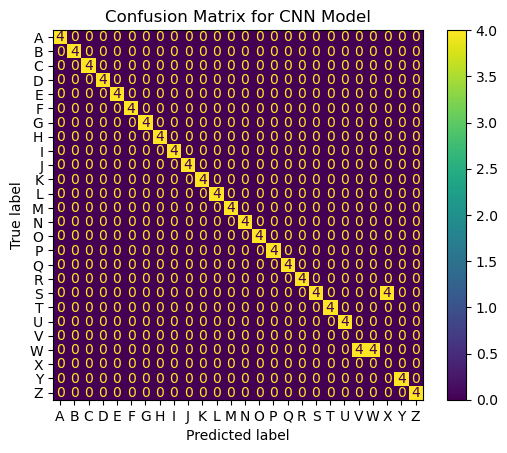

In [86]:
# visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix = conMat,
                       display_labels = list(genTest.class_indices.keys())).plot()
plt.title('Confusion Matrix for CNN Model')

In [87]:
cnn_results = classification_report(y_pred, y_test,zero_division=1)
cnn_results

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         4\n           2       1.00      1.00      1.00         4\n           3       1.00      1.00      1.00         4\n           4       1.00      1.00      1.00         4\n           5       1.00      1.00      1.00         4\n           6       1.00      1.00      1.00         4\n           7       1.00      1.00      1.00         4\n           8       1.00      1.00      1.00         4\n           9       1.00      1.00      1.00         4\n          10       1.00      1.00      1.00         4\n          11       1.00      1.00      1.00         4\n          12       1.00      1.00      1.00         4\n          13       1.00      1.00      1.00         4\n          14       1.00      1.00      1.00         4\n          15       1.00      1.00      1.00         4\n          16       1.00      1.00      1.00         4\n       

#Xception inspired

##Building and training

In [40]:
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def xception_like_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Entry Flow
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    # Middle Flow
    for _ in range(8):  # You can adjust the number of middle flow blocks
        residual = x
        x = SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
        residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same')(residual)
        x = tf.keras.layers.add([x, residual])

    # Exit Flow
    residual = Conv2D(256, (1, 1), strides=(2, 2), padding='same')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.add([x, residual])
    x = SeparableConv2D(728, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(728, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Final layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (200, 200, 3)  # Adjust according to your data
num_classes = 26  # Adjust based on the number of classes in your classification task

# Create the model
model = xception_like_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 100, 100, 32)         896       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_30 (Ba  (None, 100, 100, 32)         128       ['conv2d_11[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_12 (Conv2D)          (None, 100, 100, 64)         18496     ['batch_normalization_30

In [41]:
np.random.seed(42)
wandb.init(project="handsignlanguage",
         config={
            "loss": "categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 40,
            "batch_size": 32,
        },)
config = wandb.config
wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=10)

# Start training
startTime = time.time()
model.fit(
    genTrain,
    batch_size=32,
    steps_per_epoch=32,
    epochs=40,
    validation_data=genVal,
    validation_steps=2,
    verbose=2,
    callbacks=[wandb_callbacks,early_stopping])
finishTime = time.time()

# Calculate the time in minutes
print(f'\nThis model took {round((finishTime - startTime) / 60, 2)} minutes to finish.')

epoch/accuracy,▁▁▂▃▃▄▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇█▇█▇▇▇█████████████
epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▃█▄▇▅▆▅▃▃▆▆▇▅█▇▇▆█▇█▂▅
epoch/val_loss,▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▆▆▅▃▁▃▁▂▂▃▄▇▂▂▁▃▁▂▁▃▁▁▁█▄
epoch/accuracy,0.90625
epoch/epoch,39
epoch/learning_rate,0.001
epoch/loss,0.27721
epoch/val_accuracy,0.48438


Epoch 1/40
INFO:tensorflow:Assets written to: my_model_01\assets


INFO:tensorflow:Assets written to: my_model_01\assets
wandb: Adding directory to artifact (.\my_model_01)... Done. 0.1s


32/32 - 106s - loss: 3.2848 - accuracy: 0.0537 - val_loss: 3.2580 - val_accuracy: 0.0469 - 106s/epoch - 3s/step
Epoch 2/40
INFO:tensorflow:Assets written to: my_model_02\assets


INFO:tensorflow:Assets written to: my_model_02\assets
wandb: Adding directory to artifact (.\my_model_02)... Done. 0.1s


32/32 - 79s - loss: 3.0973 - accuracy: 0.1084 - val_loss: 3.2598 - val_accuracy: 0.0469 - 79s/epoch - 2s/step
Epoch 3/40
INFO:tensorflow:Assets written to: my_model_03\assets


INFO:tensorflow:Assets written to: my_model_03\assets
wandb: Adding directory to artifact (.\my_model_03)... Done. 0.1s


32/32 - 82s - loss: 2.6830 - accuracy: 0.1689 - val_loss: 3.2628 - val_accuracy: 0.0312 - 82s/epoch - 3s/step
Epoch 4/40
INFO:tensorflow:Assets written to: my_model_04\assets


INFO:tensorflow:Assets written to: my_model_04\assets
wandb: Adding directory to artifact (.\my_model_04)... Done. 0.1s


32/32 - 84s - loss: 2.2536 - accuracy: 0.2646 - val_loss: 3.2736 - val_accuracy: 0.0312 - 84s/epoch - 3s/step
Epoch 5/40
INFO:tensorflow:Assets written to: my_model_05\assets


INFO:tensorflow:Assets written to: my_model_05\assets
wandb: Adding directory to artifact (.\my_model_05)... Done. 0.1s


32/32 - 85s - loss: 1.9953 - accuracy: 0.3213 - val_loss: 3.2700 - val_accuracy: 0.0469 - 85s/epoch - 3s/step
Epoch 6/40
INFO:tensorflow:Assets written to: my_model_06\assets


INFO:tensorflow:Assets written to: my_model_06\assets
wandb: Adding directory to artifact (.\my_model_06)... Done. 0.1s


32/32 - 87s - loss: 1.6955 - accuracy: 0.4180 - val_loss: 3.2767 - val_accuracy: 0.0469 - 87s/epoch - 3s/step
Epoch 7/40
INFO:tensorflow:Assets written to: my_model_07\assets


INFO:tensorflow:Assets written to: my_model_07\assets
wandb: Adding directory to artifact (.\my_model_07)... Done. 0.1s


32/32 - 79s - loss: 1.5109 - accuracy: 0.4600 - val_loss: 3.2618 - val_accuracy: 0.0000e+00 - 79s/epoch - 2s/step
Epoch 8/40
INFO:tensorflow:Assets written to: my_model_08\assets


INFO:tensorflow:Assets written to: my_model_08\assets
wandb: Adding directory to artifact (.\my_model_08)... Done. 0.1s


32/32 - 79s - loss: 1.4411 - accuracy: 0.4844 - val_loss: 3.3413 - val_accuracy: 0.0156 - 79s/epoch - 2s/step
Epoch 9/40
INFO:tensorflow:Assets written to: my_model_09\assets


INFO:tensorflow:Assets written to: my_model_09\assets
wandb: Adding directory to artifact (.\my_model_09)... Done. 0.1s


32/32 - 78s - loss: 1.1580 - accuracy: 0.5801 - val_loss: 3.2715 - val_accuracy: 0.0000e+00 - 78s/epoch - 2s/step
Epoch 10/40
INFO:tensorflow:Assets written to: my_model_10\assets


INFO:tensorflow:Assets written to: my_model_10\assets
wandb: Adding directory to artifact (.\my_model_10)... Done. 0.2s


32/32 - 81s - loss: 1.1614 - accuracy: 0.6006 - val_loss: 3.2722 - val_accuracy: 0.0625 - 81s/epoch - 3s/step
Epoch 11/40
INFO:tensorflow:Assets written to: my_model_11\assets


INFO:tensorflow:Assets written to: my_model_11\assets
wandb: Adding directory to artifact (.\my_model_11)... Done. 0.1s


32/32 - 84s - loss: 1.0322 - accuracy: 0.6436 - val_loss: 3.2777 - val_accuracy: 0.0938 - 84s/epoch - 3s/step
Epoch 12/40
INFO:tensorflow:Assets written to: my_model_12\assets


INFO:tensorflow:Assets written to: my_model_12\assets
wandb: Adding directory to artifact (.\my_model_12)... Done. 0.1s


32/32 - 87s - loss: 1.0287 - accuracy: 0.6299 - val_loss: 3.3094 - val_accuracy: 0.1094 - 87s/epoch - 3s/step
Epoch 13/40
INFO:tensorflow:Assets written to: my_model_13\assets


INFO:tensorflow:Assets written to: my_model_13\assets
wandb: Adding directory to artifact (.\my_model_13)... Done. 0.1s


32/32 - 87s - loss: 0.9067 - accuracy: 0.6807 - val_loss: 3.3088 - val_accuracy: 0.0312 - 87s/epoch - 3s/step
Epoch 14/40
INFO:tensorflow:Assets written to: my_model_14\assets


INFO:tensorflow:Assets written to: my_model_14\assets
wandb: Adding directory to artifact (.\my_model_14)... Done. 0.1s


32/32 - 83s - loss: 0.9491 - accuracy: 0.6768 - val_loss: 3.2861 - val_accuracy: 0.0625 - 83s/epoch - 3s/step
Epoch 15/40
INFO:tensorflow:Assets written to: my_model_15\assets


INFO:tensorflow:Assets written to: my_model_15\assets
wandb: Adding directory to artifact (.\my_model_15)... Done. 0.1s


32/32 - 90s - loss: 0.8404 - accuracy: 0.6924 - val_loss: 3.3831 - val_accuracy: 0.0156 - 90s/epoch - 3s/step
Epoch 16/40
INFO:tensorflow:Assets written to: my_model_16\assets


INFO:tensorflow:Assets written to: my_model_16\assets
wandb: Adding directory to artifact (.\my_model_16)... Done. 0.1s


32/32 - 88s - loss: 0.6543 - accuracy: 0.7725 - val_loss: 3.4630 - val_accuracy: 0.0625 - 88s/epoch - 3s/step
Epoch 17/40
INFO:tensorflow:Assets written to: my_model_17\assets


INFO:tensorflow:Assets written to: my_model_17\assets
wandb: Adding directory to artifact (.\my_model_17)... Done. 0.1s


32/32 - 87s - loss: 0.5830 - accuracy: 0.7949 - val_loss: 2.8341 - val_accuracy: 0.0938 - 87s/epoch - 3s/step
Epoch 18/40
INFO:tensorflow:Assets written to: my_model_18\assets


INFO:tensorflow:Assets written to: my_model_18\assets
wandb: Adding directory to artifact (.\my_model_18)... Done. 0.1s


32/32 - 88s - loss: 0.5448 - accuracy: 0.8057 - val_loss: 3.1863 - val_accuracy: 0.1406 - 88s/epoch - 3s/step
Epoch 19/40
INFO:tensorflow:Assets written to: my_model_19\assets


INFO:tensorflow:Assets written to: my_model_19\assets
wandb: Adding directory to artifact (.\my_model_19)... Done. 0.1s


32/32 - 87s - loss: 0.7177 - accuracy: 0.7666 - val_loss: 1.3165 - val_accuracy: 0.5625 - 87s/epoch - 3s/step
Epoch 20/40
INFO:tensorflow:Assets written to: my_model_20\assets


INFO:tensorflow:Assets written to: my_model_20\assets
wandb: Adding directory to artifact (.\my_model_20)... Done. 0.1s


32/32 - 87s - loss: 0.6052 - accuracy: 0.7930 - val_loss: 0.4247 - val_accuracy: 0.8906 - 87s/epoch - 3s/step
Epoch 21/40
INFO:tensorflow:Assets written to: my_model_21\assets


INFO:tensorflow:Assets written to: my_model_21\assets
wandb: Adding directory to artifact (.\my_model_21)... Done. 0.1s


32/32 - 83s - loss: 0.5446 - accuracy: 0.8145 - val_loss: 0.4911 - val_accuracy: 0.7969 - 83s/epoch - 3s/step
Epoch 22/40
INFO:tensorflow:Assets written to: my_model_22\assets


INFO:tensorflow:Assets written to: my_model_22\assets
wandb: Adding directory to artifact (.\my_model_22)... Done. 0.1s


32/32 - 84s - loss: 0.5607 - accuracy: 0.8008 - val_loss: 1.9985 - val_accuracy: 0.4531 - 84s/epoch - 3s/step
Epoch 23/40
INFO:tensorflow:Assets written to: my_model_23\assets


INFO:tensorflow:Assets written to: my_model_23\assets
wandb: Adding directory to artifact (.\my_model_23)... Done. 0.1s


32/32 - 82s - loss: 0.5261 - accuracy: 0.8252 - val_loss: 0.9320 - val_accuracy: 0.6719 - 82s/epoch - 3s/step
Epoch 24/40
INFO:tensorflow:Assets written to: my_model_24\assets


INFO:tensorflow:Assets written to: my_model_24\assets
wandb: Adding directory to artifact (.\my_model_24)... Done. 0.1s


32/32 - 87s - loss: 0.4593 - accuracy: 0.8291 - val_loss: 0.4167 - val_accuracy: 0.8750 - 87s/epoch - 3s/step
Epoch 25/40
INFO:tensorflow:Assets written to: my_model_25\assets


INFO:tensorflow:Assets written to: my_model_25\assets
wandb: Adding directory to artifact (.\my_model_25)... Done. 0.1s


32/32 - 87s - loss: 0.4699 - accuracy: 0.8438 - val_loss: 5.5963 - val_accuracy: 0.2188 - 87s/epoch - 3s/step
Epoch 26/40
INFO:tensorflow:Assets written to: my_model_26\assets


INFO:tensorflow:Assets written to: my_model_26\assets
wandb: Adding directory to artifact (.\my_model_26)... Done. 0.1s


32/32 - 88s - loss: 0.3757 - accuracy: 0.8682 - val_loss: 0.3778 - val_accuracy: 0.8281 - 88s/epoch - 3s/step
Epoch 27/40
INFO:tensorflow:Assets written to: my_model_27\assets


INFO:tensorflow:Assets written to: my_model_27\assets
wandb: Adding directory to artifact (.\my_model_27)... Done. 0.1s


32/32 - 83s - loss: 0.4483 - accuracy: 0.8516 - val_loss: 2.4815 - val_accuracy: 0.4844 - 83s/epoch - 3s/step
Epoch 28/40
INFO:tensorflow:Assets written to: my_model_28\assets


INFO:tensorflow:Assets written to: my_model_28\assets
wandb: Adding directory to artifact (.\my_model_28)... Done. 0.1s


32/32 - 82s - loss: 0.3745 - accuracy: 0.8672 - val_loss: 0.9259 - val_accuracy: 0.6562 - 82s/epoch - 3s/step
Epoch 29/40
INFO:tensorflow:Assets written to: my_model_29\assets


INFO:tensorflow:Assets written to: my_model_29\assets
wandb: Adding directory to artifact (.\my_model_29)... Done. 0.1s


32/32 - 87s - loss: 0.4045 - accuracy: 0.8691 - val_loss: 1.1034 - val_accuracy: 0.6875 - 87s/epoch - 3s/step
Epoch 30/40
INFO:tensorflow:Assets written to: my_model_30\assets


INFO:tensorflow:Assets written to: my_model_30\assets
wandb: Adding directory to artifact (.\my_model_30)... Done. 0.1s


32/32 - 88s - loss: 0.3478 - accuracy: 0.8770 - val_loss: 0.3593 - val_accuracy: 0.9062 - 88s/epoch - 3s/step
Epoch 31/40
INFO:tensorflow:Assets written to: my_model_31\assets


INFO:tensorflow:Assets written to: my_model_31\assets
wandb: Adding directory to artifact (.\my_model_31)... Done. 0.1s


32/32 - 88s - loss: 0.3145 - accuracy: 0.8945 - val_loss: 0.5570 - val_accuracy: 0.7969 - 88s/epoch - 3s/step
Epoch 32/40
INFO:tensorflow:Assets written to: my_model_32\assets


INFO:tensorflow:Assets written to: my_model_32\assets
wandb: Adding directory to artifact (.\my_model_32)... Done. 0.1s


32/32 - 87s - loss: 0.3679 - accuracy: 0.8760 - val_loss: 1.9143 - val_accuracy: 0.6094 - 87s/epoch - 3s/step
Epoch 33/40
INFO:tensorflow:Assets written to: my_model_33\assets


INFO:tensorflow:Assets written to: my_model_33\assets
wandb: Adding directory to artifact (.\my_model_33)... Done. 0.1s


32/32 - 86s - loss: 0.3345 - accuracy: 0.8965 - val_loss: 1.5750 - val_accuracy: 0.7188 - 86s/epoch - 3s/step
Epoch 34/40
INFO:tensorflow:Assets written to: my_model_34\assets


INFO:tensorflow:Assets written to: my_model_34\assets
wandb: Adding directory to artifact (.\my_model_34)... Done. 0.1s


32/32 - 83s - loss: 0.3147 - accuracy: 0.8945 - val_loss: 1.1277 - val_accuracy: 0.6562 - 83s/epoch - 3s/step
Epoch 35/40
INFO:tensorflow:Assets written to: my_model_35\assets


INFO:tensorflow:Assets written to: my_model_35\assets
wandb: Adding directory to artifact (.\my_model_35)... Done. 0.1s


32/32 - 82s - loss: 0.3463 - accuracy: 0.8809 - val_loss: 0.0696 - val_accuracy: 0.9688 - 82s/epoch - 3s/step
Epoch 36/40
INFO:tensorflow:Assets written to: my_model_36\assets


INFO:tensorflow:Assets written to: my_model_36\assets
wandb: Adding directory to artifact (.\my_model_36)... Done. 0.1s


32/32 - 87s - loss: 0.3917 - accuracy: 0.8760 - val_loss: 0.6087 - val_accuracy: 0.8125 - 87s/epoch - 3s/step
Epoch 37/40
INFO:tensorflow:Assets written to: my_model_37\assets


INFO:tensorflow:Assets written to: my_model_37\assets
wandb: Adding directory to artifact (.\my_model_37)... Done. 0.1s


32/32 - 88s - loss: 0.3622 - accuracy: 0.8867 - val_loss: 0.9985 - val_accuracy: 0.6719 - 88s/epoch - 3s/step
Epoch 38/40
INFO:tensorflow:Assets written to: my_model_38\assets


INFO:tensorflow:Assets written to: my_model_38\assets
wandb: Adding directory to artifact (.\my_model_38)... Done. 0.1s


32/32 - 87s - loss: 0.3425 - accuracy: 0.8906 - val_loss: 0.7970 - val_accuracy: 0.7812 - 87s/epoch - 3s/step
Epoch 39/40
INFO:tensorflow:Assets written to: my_model_39\assets


INFO:tensorflow:Assets written to: my_model_39\assets
wandb: Adding directory to artifact (.\my_model_39)... Done. 0.1s


32/32 - 88s - loss: 0.2960 - accuracy: 0.9014 - val_loss: 0.2540 - val_accuracy: 0.8750 - 88s/epoch - 3s/step
Epoch 40/40
INFO:tensorflow:Assets written to: my_model_40\assets


INFO:tensorflow:Assets written to: my_model_40\assets
wandb: Adding directory to artifact (.\my_model_40)... Done. 0.1s


32/32 - 85s - loss: 0.2948 - accuracy: 0.9062 - val_loss: 1.8345 - val_accuracy: 0.5938 - 85s/epoch - 3s/step

This model took 57.93 minutes to finish.


In [43]:
# Define the directory where you want to save the model
model_save_path = modelpath+"second_run_xception_inspired_model.h5"

# Save the model in the specified directory
model.save(model_save_path)

# Print a message to indicate that the model has been saved
print("Trained model path has been saved.")

Trained model path has been saved.


##Model Evaluation

In [51]:
# do the prediction
y_pred = []
for i in genTest.class_indices:
    # take the path of data test
    labelTest = dirTest+'/'+i+'/'
    for j in os.listdir(labelTest):
        # save the label
        x_pred = labelTest + j

        # load image into matrix
        img = image.load_img(x_pred, target_size = (200, 200))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        matxImg = np.vstack([x])

        # so what is the label?
        predict = model.predict(matxImg, batch_size = 32)
        predict = np.argmax(predict, axis = 1)
        y_pred.append(predict[0])

1/1 [==============================] - 0s 84ms/step


In [53]:
# calculate the accuracy of the prediction
acc_result = round(accuracy_score(y_pred, y_test), 2)
print('Accuracy: ', acc_result)

Accuracy:  0.04


In [54]:
# show the confusion matrix
conMat = confusion_matrix(y_pred, y_test,
                          labels = list(genTest.class_indices.values()))
print(conMat)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 

In [55]:
model_results = classification_report(y_pred, y_test,zero_division=1)

In [56]:
model_results

'              precision    recall  f1-score   support\n\n           0       0.00      1.00      0.00         0\n           1       0.00      1.00      0.00         0\n           2       0.00      1.00      0.00         0\n           3       0.00      1.00      0.00         0\n           4       0.00      1.00      0.00         0\n           5       0.00      1.00      0.00         0\n           6       0.00      1.00      0.00         0\n           7       0.00      1.00      0.00         0\n           8       0.00      1.00      0.00         0\n           9       0.00      1.00      0.00         0\n          10       0.00      1.00      0.00         0\n          11       0.00      1.00      0.00         0\n          12       0.00      1.00      0.00         0\n          13       0.00      1.00      0.00         0\n          14       0.00      1.00      0.00         0\n          15       1.00      0.04      0.07       104\n          16       0.00      1.00      0.00         0\n       